In [2]:
import yfinance as yf
import pandas as pd
import csv

# Defining the list of tickers
tickers = ['TSLA']


# Creating a list of years to loop through
years = range(2014, 2023)

# Creating a dictionary to store dataframes for each year
yearly_dfs = {}

# Looping through each year and create dataframes
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year + 1}-01-01"
    df_list = []

    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
            data['Ticker'] = ticker
            df_list.append(data)
        except KeyError:
            print(f"Skipping ticker {ticker} for {year} - data not found.")

    # Concatenating the dataframes for the current year
    if df_list:
        yearly_df = pd.concat(df_list)
        yearly_dfs[year] = yearly_df

# Verifying if data was found for any year
if not yearly_dfs:
    print("No valid data found for any year. Exiting.")
    exit()

# Looping through the yearly dataframes and compute features for each year
for year, yearly_df in yearly_dfs.items():
    
    # Calculating mean returns and volatility for each ticker
    returns = yearly_df.pivot_table(values='Close', index='Date', columns='Ticker')
    daily_returns = returns.pct_change()
    mean_returns = daily_returns.mean()
    volatility = daily_returns.std()

    # Calculating mean returns and volatility for each ticker's volume
    returns2 = yearly_df.pivot_table(values='Volume', index='Date', columns='Ticker')
    daily_returns2 = returns2.pct_change()
    mean_returns2 = daily_returns2.mean()
    volatility2 = daily_returns2.std()

    # Creating a new dataframe to store the features
    df_name = f"X{year}"
    df = pd.DataFrame(index=tickers)

    # Establishing the features in the dataframe
    df['Close STD'] = yearly_df.groupby('Ticker')['Close'].std()
    df['Volume STD'] = yearly_df.groupby('Ticker')['Volume'].std()

    df['Close Mean'] = yearly_df.groupby('Ticker')['Close'].mean()
    df['Volume Mean'] = yearly_df.groupby('Ticker')['Volume'].mean()

    df['Close Max'] = yearly_df.groupby('Ticker')['Close'].max()
    df['Volume Max'] = yearly_df.groupby('Ticker')['Volume'].max()

    df['Close Min'] = yearly_df.groupby('Ticker')['Close'].min()
    df['Volume Min'] = yearly_df.groupby('Ticker')['Volume'].min()

    df['Close Median'] = yearly_df.groupby('Ticker')['Close'].median()
    df['Volume Median'] = yearly_df.groupby('Ticker')['Volume'].median()

    df['Close Range'] = df['Close Max'] - df['Close Min']
    df['Volume Range'] = df['Volume Max'] - df['Volume Min']

    df['Mean Returns'] = mean_returns
    df['Volatility'] = volatility

    df['Volume Mean Returns'] = mean_returns2
    df['Volume Volatility'] = volatility2

    df['Close Skewness'] = yearly_df.groupby('Ticker')['Close'].skew()
    df['Volume Skewness'] = yearly_df.groupby('Ticker')['Volume'].skew()

    # Store the dataframe in the dictionary
    yearly_dfs[year] = df

# Display the head of each dataframe
for year, df in yearly_dfs.items():
    print(f"Dataframe {year}:")
    print(df.head())
    print("\n")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Dataframe 2014:
      Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
TSLA    1.95321  5.879184e+07   14.888606  1.037096e+08  19.069332   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
TSLA   490225500   9.289333    19983000        14.981     89650500.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
TSLA     9.77999

In [ ]:
import yfinance as yf
import pandas as pd
import csv

# Defining the list of tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Creating a list of years to loop through
years = range(2014, 2023)

# Creating a dictionary to store dataframes for each year
yearly_dfs = {}

# Looping through each year and create dataframes
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year + 1}-01-01"
    df_list = []

    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
            data['Ticker'] = ticker
            df_list.append(data)
        except KeyError:
            print(f"Skipping ticker {ticker} for {year} - data not found.")

    # Concatenating the dataframes for the current year
    if df_list:
        yearly_df = pd.concat(df_list)
        yearly_dfs[year] = yearly_df

# Verifying if data was found for any year
if not yearly_dfs:
    print("No valid data found for any year. Exiting.")
    exit()

# Looping through the yearly dataframes and compute features for each year
for year, yearly_df in yearly_dfs.items():
    
    # Calculating mean returns and volatility for each ticker
    returns = yearly_df.pivot_table(values='Close', index='Date', columns='Ticker')
    daily_returns = returns.pct_change()
    mean_returns = daily_returns.mean()
    volatility = daily_returns.std()

    # Calculating mean returns and volatility for each ticker's volume
    returns2 = yearly_df.pivot_table(values='Volume', index='Date', columns='Ticker')
    daily_returns2 = returns2.pct_change()
    mean_returns2 = daily_returns2.mean()
    volatility2 = daily_returns2.std()

    # Creating a new dataframe to store the features
    df_name = f"X{year}"
    df = pd.DataFrame(index=tickers)

    # Establishing the features in the dataframe
    df['Close STD'] = yearly_df.groupby('Ticker')['Close'].std()
    df['Volume STD'] = yearly_df.groupby('Ticker')['Volume'].std()

    df['Close Mean'] = yearly_df.groupby('Ticker')['Close'].mean()
    df['Volume Mean'] = yearly_df.groupby('Ticker')['Volume'].mean()

    df['Close Max'] = yearly_df.groupby('Ticker')['Close'].max()
    df['Volume Max'] = yearly_df.groupby('Ticker')['Volume'].max()

    df['Close Min'] = yearly_df.groupby('Ticker')['Close'].min()
    df['Volume Min'] = yearly_df.groupby('Ticker')['Volume'].min()

    df['Close Median'] = yearly_df.groupby('Ticker')['Close'].median()
    df['Volume Median'] = yearly_df.groupby('Ticker')['Volume'].median()

    df['Close Range'] = df['Close Max'] - df['Close Min']
    df['Volume Range'] = df['Volume Max'] - df['Volume Min']

    df['Mean Returns'] = mean_returns
    df['Volatility'] = volatility

    df['Volume Mean Returns'] = mean_returns2
    df['Volume Volatility'] = volatility2

    df['Close Skewness'] = yearly_df.groupby('Ticker')['Close'].skew()
    df['Volume Skewness'] = yearly_df.groupby('Ticker')['Volume'].skew()

    # Store the dataframe in the dictionary
    yearly_dfs[year] = df

# Display the head of each dataframe
for year, df in yearly_dfs.items():
    print(f"Dataframe {year}:")
    print(df.head())
    print("\n")


In [ ]:
import yfinance as yf
import pandas as pd
import csv

# Defining the list of tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Creating a list of years to loop through
years = range(2014, 2022)

# Creating a dictionary to store dataframes for each year
yearly_dfs = {}

# Looping through each year and create dataframes
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year + 1}-01-01"
    df_list = []

    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
            data['Ticker'] = ticker
            df_list.append(data)
        except KeyError:
            print(f"Skipping ticker {ticker} for {year} - data not found.")

    # Concatenating the dataframes for the current year
    if df_list:
        yearly_df = pd.concat(df_list)
        yearly_dfs[year] = yearly_df

# Verifying if data was found for any year
if not yearly_dfs:
    print("No valid data found for any year. Exiting.")
    exit()

# Looping through the yearly dataframes and compute features for each year
for year, yearly_df in yearly_dfs.items():
    
    # Calculating mean returns and volatility for each ticker
    returns = yearly_df.pivot_table(values='Close', index='Date', columns='Ticker')
    daily_returns = returns.pct_change()
    mean_returns = daily_returns.mean()
    volatility = daily_returns.std()

    # Calculating mean returns and volatility for each ticker's volume
    returns2 = yearly_df.pivot_table(values='Volume', index='Date', columns='Ticker')
    daily_returns2 = returns2.pct_change()
    mean_returns2 = daily_returns2.mean()
    volatility2 = daily_returns2.std()

    # Creating a new dataframe to store the features
    X = pd.DataFrame(index=tickers)

    # Establishing the features in the dataframe
    X['Close STD'] = yearly_df.groupby('Ticker')['Close'].std()
    X['Volume STD'] = yearly_df.groupby('Ticker')['Volume'].std()

    X['Close Mean'] = yearly_df.groupby('Ticker')['Close'].mean()
    X['Volume Mean'] = yearly_df.groupby('Ticker')['Volume'].mean()

    X['Close Max'] = yearly_df.groupby('Ticker')['Close'].max()
    X['Volume Max'] = yearly_df.groupby('Ticker')['Volume'].max()

    X['Close Min'] = yearly_df.groupby('Ticker')['Close'].min()
    X['Volume Min'] = yearly_df.groupby('Ticker')['Volume'].min()

    X['Close Median'] = yearly_df.groupby('Ticker')['Close'].median()
    X['Volume Median'] = yearly_df.groupby('Ticker')['Volume'].median()

    X['Close Range'] = X['Close Max'] - X['Close Min']
    X['Volume Range'] = X['Volume Max'] - X['Volume Min']

    X['Mean Returns'] = mean_returns
    X['Volatility'] = volatility

    X['Volume Mean Returns'] = mean_returns2
    X['Volume Volatility'] = volatility2

    X['Close Skewness'] = yearly_df.groupby('Ticker')['Close'].skew()
    X['Volume Skewness'] = yearly_df.groupby('Ticker')['Volume'].skew()

    # Display the resulting dataframe
    print(f"Dataframe for year {year}:")
    print(X.head())
    print("\n")



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2014-01-01", end="2015-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X['Close STD'] = df.groupby('Ticker')['Close'].std()
X['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X['Close Max'] = df.groupby('Ticker')['Close'].max()
X['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X['Close Min'] = df.groupby('Ticker')['Close'].min()
X['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X['Close Median'] = df.groupby('Ticker')['Close'].median()
X['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X['Close Range'] = X8['Close Max'] - X8['Close Min']
X['Volume Range'] = X8['Volume Max'] - X8['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X['Mean Returns'] = mean_returns
X['Volatility'] = volatility

X['Volume Mean Returns'] = mean_returns2
X['Volume Volatility'] = volatility2



X['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui
# Crie um novo dataframe para armazenar as características
# Exiba o dataframe resultante
X.head()

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2014-01-01", end="2015-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X8 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X8['Close STD'] = df.groupby('Ticker')['Close'].std()
X8['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X8['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X8['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X8['Close Max'] = df.groupby('Ticker')['Close'].max()
X8['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X8['Close Min'] = df.groupby('Ticker')['Close'].min()
X8['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X8['Close Median'] = df.groupby('Ticker')['Close'].median()
X8['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X8['Close Range'] = X8['Close Max'] - X8['Close Min']
X8['Volume Range'] = X8['Volume Max'] - X8['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X8['Mean Returns'] = mean_returns
X8['Volatility'] = volatility

X8['Volume Mean Returns'] = mean_returns2
X8['Volume Volatility'] = volatility2



X8['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X8['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui
# Crie um novo dataframe para armazenar as características
# Exiba o dataframe resultante
X8.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1388552400, endDate = 1420088400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AADI: Data doesn't exist for startDate = 1388552400, endDate = 1420088400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1388552400, endDate = 1420088400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- A

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X8.index = X8.index.astype(str) + '14'

# Display the updated pivot table
print(X8)


        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A14      1.302556  1.964086e+06   40.621294  3.011466e+06  43.583691   
AA14     4.950604  5.513130e+06   34.725734  8.519227e+06  42.292801   
AAC14         NaN           NaN         NaN           NaN        NaN   
AACG14   0.399879  3.457697e+04    4.251349  1.678770e+04   5.390000   
AADI14        NaN           NaN         NaN           NaN        NaN   
...           ...           ...         ...           ...        ...   
ZVSA14        NaN           NaN         NaN           NaN        NaN   
ZWS14    1.115207  7.748832e+05   27.987619  6.575603e+05  30.820000   
ZYME14        NaN           NaN         NaN           NaN        NaN   
ZYNE14        NaN           NaN         NaN           NaN        NaN   
ZYXI14   0.103559  2.737738e+04    0.253788  1.882571e+04   0.463636   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A14     24946891.0  36.988556    588000.0     40.736767      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2015-01-01", end="2016-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X7 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X7['Close STD'] = df.groupby('Ticker')['Close'].std()
X7['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X7['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X7['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X7['Close Max'] = df.groupby('Ticker')['Close'].max()
X7['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X7['Close Min'] = df.groupby('Ticker')['Close'].min()
X7['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X7['Close Median'] = df.groupby('Ticker')['Close'].median()
X7['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X7['Close Range'] = X7['Close Max'] - X7['Close Min']
X7['Volume Range'] = X7['Volume Max'] - X7['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X7['Mean Returns'] = mean_returns
X7['Volatility'] = volatility

X7['Volume Mean Returns'] = mean_returns2
X7['Volume Volatility'] = volatility2



X7['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X7['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
X7.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1420088400, endDate = 1451624400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AADI: Data doesn't exist for startDate = 1420088400, endDate = 1451624400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1420088400, endDate = 1451624400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- A

Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A      2.395132  1.277216e+06   39.602143  2.560682e+06  43.549999   
AA     5.936507  4.954633e+06   28.055025  1.064911e+07  41.019211   
AAC         NaN           NaN         NaN           NaN        NaN   
AACG   1.019165  3.091270e+04    4.285198  2.512421e+04   6.720000   
AADI        NaN           NaN         NaN           NaN        NaN   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A      9007200.0  33.369999    834300.0     40.080000      2230600.0   
AA    39826675.0  18.791460   3870662.0     26.589195      9679088.5   
AAC          NaN        NaN         NaN           NaN            NaN   
AACG    326100.0   2.250000         0.0      4.365000        17600.0   
AADI         NaN        NaN         NaN           NaN            NaN   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       10.180000     8172900.0      0.000221    0.014197   
AA      22.227751    35956013.0     -0.001603    0.024162   
AAC           NaN           NaN           NaN         NaN   
AACG     4.470000      326100.0      0.001987    0.038842   
AADI          NaN           NaN           NaN         NaN   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.100531           0.519131       -0.656281         1.977359  
AA               0.093740           0.534582        0.396899         1.957966  
AAC                   NaN                NaN             NaN              NaN  
AACG                  inf                NaN       -0.152194         4.944033  
AADI                  NaN                NaN             NaN              NaN

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X7.index = X7.index.astype(str) + '15'

# Display the updated pivot table
print(X7)


        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A15      2.395132  1.277216e+06   39.602143  2.560682e+06  43.549999   
AA15     5.936507  4.954633e+06   28.055025  1.064911e+07  41.019211   
AAC15         NaN           NaN         NaN           NaN        NaN   
AACG15   1.019165  3.091270e+04    4.285198  2.512421e+04   6.720000   
AADI15        NaN           NaN         NaN           NaN        NaN   
...           ...           ...         ...           ...        ...   
ZVSA15        NaN           NaN         NaN           NaN        NaN   
ZWS15    3.582909  4.364029e+05   22.971190  6.618393e+05  28.190001   
ZYME15        NaN           NaN         NaN           NaN        NaN   
ZYNE15   6.857980  1.628470e+05   17.584808  1.269510e+05  36.490002   
ZYXI15   0.048848  2.698744e+04    0.176443  1.031119e+04   0.409091   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A15      9007200.0  33.369999    834300.0     40.080000      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2016-01-01", end="2017-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X5 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X5['Close STD'] = df.groupby('Ticker')['Close'].std()
X5['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X5['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X5['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X5['Close Max'] = df.groupby('Ticker')['Close'].max()
X5['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X5['Close Min'] = df.groupby('Ticker')['Close'].min()
X5['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X5['Close Median'] = df.groupby('Ticker')['Close'].median()
X5['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X5['Close Range'] = X5['Close Max'] - X5['Close Min']
X5['Volume Range'] = X5['Volume Max'] - X5['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X5['Mean Returns'] = mean_returns
X5['Volatility'] = volatility

X5['Volume Mean Returns'] = mean_returns2
X5['Volume Volatility'] = volatility2



X5['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X5['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
X5.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AADI: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1451624400, endDate = 1483246800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- A

Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A      3.598204  9.207981e+05   43.369960  2.083069e+06  48.439999   
AA     3.418893  5.777594e+06   23.848457  9.774655e+06  32.049999   
AAC         NaN           NaN         NaN           NaN        NaN   
AACG   0.690378  7.323671e+04    4.653849  1.593492e+04   7.190000   
AADI        NaN           NaN         NaN           NaN        NaN   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A      7130400.0  34.799999    727700.0     44.870001      1834950.0   
AA    40784270.0  16.196220   1708900.0     23.453279      8385691.0   
AAC          NaN        NaN         NaN           NaN            NaN   
AACG   1132300.0   3.520000         0.0      4.640000         5100.0   
AADI         NaN        NaN         NaN           NaN            NaN   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       13.639999     6402700.0      0.000559    0.014693   
AA      15.853779    39075370.0      0.001176    0.029718   
AAC           NaN           NaN           NaN         NaN   
AACG     3.670000     1132300.0     -0.001248    0.042240   
AADI          NaN           NaN           NaN         NaN   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.076124           0.477646       -0.614485         1.596216  
AA               0.062175           0.425884        0.279015         1.911772  
AAC                   NaN                NaN             NaN              NaN  
AACG                  inf                NaN        0.275788        14.293492  
AADI                  NaN                NaN             NaN              NaN

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X5.index = X5.index.astype(str) + '16'

# Display the updated pivot table
print(X5)


        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A16      3.598204  9.207981e+05   43.369960  2.083069e+06  48.439999   
AA16     3.418893  5.777594e+06   23.848457  9.774655e+06  32.049999   
AAC16         NaN           NaN         NaN           NaN        NaN   
AACG16   0.690378  7.323671e+04    4.653849  1.593492e+04   7.190000   
AADI16        NaN           NaN         NaN           NaN        NaN   
...           ...           ...         ...           ...        ...   
ZVSA16        NaN           NaN         NaN           NaN        NaN   
ZWS16    1.794846  5.079455e+05   19.932103  5.962647e+05  22.639999   
ZYME16        NaN           NaN         NaN           NaN        NaN   
ZYNE16   2.834345  3.532934e+05    9.856944  2.266520e+05  21.030001   
ZYXI16   0.055863  1.704739e+04    0.268831  8.148294e+03   0.400000   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A16      7130400.0  34.799999    727700.0     44.870001      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2017-01-01", end="2018-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X6 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X6['Close STD'] = df.groupby('Ticker')['Close'].std()
X6['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X6['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X6['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X6['Close Max'] = df.groupby('Ticker')['Close'].max()
X6['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X6['Close Min'] = df.groupby('Ticker')['Close'].min()
X6['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X6['Close Median'] = df.groupby('Ticker')['Close'].median()
X6['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X6['Close Range'] = X6['Close Max'] - X6['Close Min']
X6['Volume Range'] = X6['Volume Max'] - X6['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X6['Mean Returns'] = mean_returns
X6['Volatility'] = volatility

X6['Volume Mean Returns'] = mean_returns2
X6['Volume Volatility'] = volatility2



X6['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X6['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
X6.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1483246800, endDate = 1514782800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AADI: Data doesn't exist for startDate = 1483246800, endDate = 1514782800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1483246800, endDate = 1514782800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- A

Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A      6.666723  9.048819e+05   59.329681  1.850937e+06  70.589996   
AA     5.909977  1.897551e+06   38.301673  4.134635e+06  54.139999   
AAC         NaN           NaN         NaN           NaN        NaN   
AACG   0.611932  2.541956e+04    4.265896  1.420757e+04   5.660000   
AADI        NaN           NaN         NaN           NaN        NaN   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A      7510600.0  46.490002    532700.0     59.799999      1617500.0   
AA    14773500.0  28.830000   1306100.0     36.599998      3695600.0   
AAC          NaN        NaN         NaN           NaN            NaN   
AACG    295300.0   2.970000         0.0      4.530000         7000.0   
AADI         NaN        NaN         NaN           NaN            NaN   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       24.099995     6977900.0      0.001515    0.010419   
AA      25.309999    13467400.0      0.002780    0.023611   
AAC           NaN           NaN           NaN         NaN   
AACG     2.690000      295300.0      0.001141    0.032457   
AADI          NaN           NaN           NaN         NaN   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.081107           0.478001       -0.192718         2.819937  
AA               0.105070           0.545891        0.556088         2.354195  
AAC                   NaN                NaN             NaN              NaN  
AACG                  inf                NaN       -0.217606         6.509774  
AADI                  NaN                NaN             NaN              NaN

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X6.index = X6.index.astype(str) + '17'

# Display the updated pivot table
print(X6)


        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A17      6.666723  9.048819e+05   59.329681  1.850937e+06  70.589996   
AA17     5.909977  1.897551e+06   38.301673  4.134635e+06  54.139999   
AAC17         NaN           NaN         NaN           NaN        NaN   
AACG17   0.611932  2.541956e+04    4.265896  1.420757e+04   5.660000   
AADI17        NaN           NaN         NaN           NaN        NaN   
...           ...           ...         ...           ...        ...   
ZVSA17        NaN           NaN         NaN           NaN        NaN   
ZWS17    1.244871  6.036193e+05   23.687888  9.133637e+05  26.209999   
ZYME17   1.790062  7.806514e+04    8.834327  2.767719e+04  13.280000   
ZYNE17   5.450367  1.121134e+06   15.429641  6.175347e+05  25.190001   
ZYXI17   0.874225  4.885903e+04    1.015610  3.383661e+04   2.890909   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A17      7510600.0  46.490002    532700.0     59.799999      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2019-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X0 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X0['Close STD'] = df.groupby('Ticker')['Close'].std()
X0['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X0['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X0['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X0['Close Max'] = df.groupby('Ticker')['Close'].max()
X0['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X0['Close Min'] = df.groupby('Ticker')['Close'].min()
X0['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X0['Close Median'] = df.groupby('Ticker')['Close'].median()
X0['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X0['Close Range'] = X0['Close Max'] - X0['Close Min']
X0['Volume Range'] = X0['Volume Max'] - X0['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X0['Mean Returns'] = mean_returns
X0['Volatility'] = volatility

X0['Volume Mean Returns'] = mean_returns2
X0['Volume Volatility'] = volatility2



X0['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X0['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()




# Adicione outras features aqui

# Exiba o dataframe resultante
print(X0.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1514782800, endDate = 1546318800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1514782800, endDate = 1546318800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAN: Data doesn't exist for startDate = 1514782800, endDate = 1546318800
[*********************10

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X0.index = X0.index.astype(str) + '18'

# Display the updated pivot table
print(X0)


        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A18      3.142219  1.270441e+06   67.169363  2.592049e+06  74.820000   
AA18     7.629438  2.424273e+06   44.206096  3.972290e+06  60.230000   
AAC18         NaN           NaN         NaN           NaN        NaN   
AACG18   1.964197  1.130575e+06    3.823386  1.936371e+05   6.870000   
AADI18  14.503727  7.756137e+03   51.951575  3.932228e+03  75.000000   
...           ...           ...         ...           ...        ...   
ZVSA18        NaN           NaN         NaN           NaN        NaN   
ZWS18    1.835709  3.573268e+05   28.581594  6.870080e+05  31.860001   
ZYME18   2.390837  1.442033e+05   13.463992  1.070219e+05  21.860001   
ZYNE18   2.465178  4.257458e+05    8.535120  3.867586e+05  13.460000   
ZYXI18   0.515745  3.299638e+04    3.075915  3.365737e+04   4.890909   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A18     14451200.0  61.130001    864400.0     67.000000      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2019-01-01", end="2020-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X1 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X1['Close STD'] = df.groupby('Ticker')['Close'].std()
X1['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X1['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X1['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X1['Close Max'] = df.groupby('Ticker')['Close'].max()
X1['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X1['Close Min'] = df.groupby('Ticker')['Close'].min()
X1['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X1['Close Median'] = df.groupby('Ticker')['Close'].median()
X1['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X1['Close Range'] = X1['Close Max'] - X1['Close Min']
X1['Volume Range'] = X1['Volume Max'] - X1['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X1['Mean Returns'] = mean_returns
X1['Volatility'] = volatility

X1['Volume Mean Returns'] = mean_returns2
X1['Volume Volatility'] = volatility2



X1['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X1['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
print(X1.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1546318800, endDate = 1577854800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1546318800, endDate = 1577854800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAN: Data doesn't exist for startDate = 1546318800, endDate = 1577854800
[*********************10

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X1.index = X1.index.astype(str) + '19'

# Display the updated pivot table
print(X1)

        Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A19      4.905251  1.281845e+06   75.211825  2.157036e+06  85.449997   
AA19     3.760791  1.436868e+06   23.689484  3.674701e+06  30.980000   
AAC19         NaN           NaN         NaN           NaN        NaN   
AACG19   0.565687  4.757221e+06    1.770913  6.358504e+05   3.850000   
AADI19  15.439660  3.606520e+04   19.134464  1.662471e+04  63.750000   
...           ...           ...         ...           ...        ...   
ZVSA19        NaN           NaN         NaN           NaN        NaN   
ZWS19    2.134569  5.185625e+05   27.867698  7.385913e+05  33.060001   
ZYME19   8.797959  2.216245e+05   23.934048  2.428437e+05  45.459999   
ZYNE19   3.275859  1.524216e+06    8.663056  1.381370e+06  15.500000   
ZYXI19   2.213604  3.135957e+05    6.858405  2.660092e+05  11.372727   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A19     14523800.0  63.270000    271900.0     75.785000      

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2020-01-01", end="2021-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X2 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X2['Close STD'] = df.groupby('Ticker')['Close'].std()
X2['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X2['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X2['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X2['Close Max'] = df.groupby('Ticker')['Close'].max()
X2['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X2['Close Min'] = df.groupby('Ticker')['Close'].min()
X2['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X2['Close Median'] = df.groupby('Ticker')['Close'].median()
X2['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X2['Close Range'] = X2['Close Max'] - X2['Close Min']
X2['Volume Range'] = X2['Volume Max'] - X2['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X2['Mean Returns'] = mean_returns
X2['Volatility'] = volatility

X2['Volume Mean Returns'] = mean_returns2
X2['Volume Volatility'] = volatility2



X2['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X2['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
X2.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAC: Data doesn't exist for startDate = 1577854800, endDate = 1609477200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1577854800, endDate = 1609477200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]

Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A     13.703423  9.105838e+05   92.514348  1.851855e+06  119.300003   
AA     4.564732  3.383455e+06   13.388577  7.202748e+06   24.010000   
AAC         NaN           NaN         NaN           NaN         NaN   
AACG   0.203427  1.438364e+05    1.104269  5.681937e+04    1.710000   
AADI   6.157255  3.348225e+05   16.248083  1.086822e+05   33.750000   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A      5559900.0  63.369999    636000.0     90.120003      1646200.0   
AA    25817600.0   5.480000   1075300.0     13.060000      6596100.0   
AAC          NaN        NaN         NaN           NaN            NaN   
AACG   1621800.0   0.670000       700.0      1.120000        23800.0   
AADI   4358347.0   6.750000      1280.0     18.299999        41653.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       55.930004     4923900.0      0.001540    0.023051   
AA      18.530000    24742300.0      0.001608    0.051365   
AAC           NaN           NaN           NaN         NaN   
AACG     1.040000     1621100.0      0.001089    0.056989   
AADI    27.000000     4357067.0      0.003953    0.066208   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.073733           0.434589        0.126964         1.500129  
AA               0.084401           0.499893        0.410672         1.724766  
AAC                   NaN                NaN             NaN              NaN  
AACG             1.111295           3.971520        0.155720         7.423443  
AADI             0.550816           2.163947        0.154584         9.542182

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X2.index = X2.index.astype(str) + '20'

# Display the updated pivot table
print(X2)

        Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A20     13.703423  9.105838e+05   92.514348  1.851855e+06  119.300003   
AA20     4.564732  3.383455e+06   13.388577  7.202748e+06   24.010000   
AAC20         NaN           NaN         NaN           NaN         NaN   
AACG20   0.203427  1.438364e+05    1.104269  5.681937e+04    1.710000   
AADI20   6.157255  3.348225e+05   16.248083  1.086822e+05   33.750000   
...           ...           ...         ...           ...         ...   
ZVSA20        NaN           NaN         NaN           NaN         NaN   
ZWS20    4.399332  4.097953e+05   30.704783  8.123735e+05   39.580002   
ZYME20   6.882043  3.310726e+05   39.633992  4.321312e+05   54.990002   
ZYNE20   0.839934  1.369643e+06    4.205494  9.350059e+05    6.540000   
ZYXI20   4.047747  7.756579e+05   14.115667  8.274630e+05   25.981817   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A20      5559900.0  63.369999    636000.0     90.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2021-01-01", end="2022-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X3 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X3['Close STD'] = df.groupby('Ticker')['Close'].std()
X3['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X3['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X3['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X3['Close Max'] = df.groupby('Ticker')['Close'].max()
X3['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X3['Close Min'] = df.groupby('Ticker')['Close'].min()
X3['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X3['Close Median'] = df.groupby('Ticker')['Close'].median()
X3['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X3['Close Range'] = X3['Close Max'] - X3['Close Min']
X3['Volume Range'] = X3['Volume Max'] - X3['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X3['Mean Returns'] = mean_returns
X3['Volatility'] = volatility

X3['Volume Mean Returns'] = mean_returns2
X3['Volume Volatility'] = volatility2



X3['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X3['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()



# Adicione outras features aqui

# Exiba o dataframe resultante
X3.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAMC: Data doesn't exist for startDate = 1609477200, endDate = 1641013200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[******

Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A     16.619439  7.098475e+05  144.658730  1.623303e+06  179.279999   
AA    10.001692  3.982020e+06   38.668770  7.578435e+06   59.830002   
AAC    0.052946  4.349658e+05    9.783485  2.761071e+05   10.000000   
AACG   1.357207  2.009547e+07    2.896667  1.765841e+06   14.300000   
AADI   4.979540  1.380331e+06   25.402163  2.748825e+05   41.849998   

       Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
A       8445100.0  114.989998    764300.0    148.080002      1476200.0   
AA     33374900.0   18.000000   2599900.0     38.445000      6647850.0   
AAC     2826400.0    9.670000      2900.0      9.780000       100900.0   
AACG  315842300.0    1.040000      6500.0      2.800000        57300.0   
AADI   16388513.0   15.450000     13073.0     26.075000        72596.5   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       64.290001     7680800.0      0.001268    0.013028   
AA      41.830002    30775000.0      0.004535    0.039720   
AAC      0.330000     2823500.0     -0.000061    0.003633   
AACG    13.260000   315835800.0      0.030750    0.604645   
AADI    26.399999    16375440.0      0.003717    0.068073   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.069666           0.469765        0.126286         4.356444  
AA               0.101028           0.568179       -0.144381         3.485223  
AAC              3.012020          10.813297        0.655225         3.050593  
AACG            60.418332         940.261950        2.796823        15.370510  
AADI             4.238825          47.062251       -0.129098        10.546016

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X3.index = X3.index.astype(str) + '21'

# Display the updated pivot table
print(X3)

        Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A21     16.619439  7.098475e+05  144.658730  1.623303e+06  179.279999   
AA21    10.001692  3.982020e+06   38.668770  7.578435e+06   59.830002   
AAC21    0.052946  4.349658e+05    9.783485  2.761071e+05   10.000000   
AACG21   1.357207  2.009547e+07    2.896667  1.765841e+06   14.300000   
AADI21   4.979540  1.380331e+06   25.402163  2.748825e+05   41.849998   
...           ...           ...         ...           ...         ...   
ZVSA21        NaN           NaN         NaN           NaN         NaN   
ZWS21    8.719696  5.274268e+05   47.453175  8.424437e+05   65.199997   
ZYME21   8.530067  4.490575e+05   31.506627  5.346194e+05   56.810001   
ZYNE21   0.756813  6.324988e+06    4.371429  2.482697e+06    8.760000   
ZYXI21   2.062600  3.486765e+05   13.232792  4.137493e+05   19.736364   

         Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
A21       8445100.0  114.989998    764300.0    

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = []
with open('noteslatickers.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        ticker = row[0]
        tickers.append(ticker)

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
X4 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
X4['Close STD'] = df.groupby('Ticker')['Close'].std()
X4['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
X4['Close Mean'] = df.groupby('Ticker')['Close'].mean()
X4['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
X4['Close Max'] = df.groupby('Ticker')['Close'].max()
X4['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
X4['Close Min'] = df.groupby('Ticker')['Close'].min()
X4['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
X4['Close Median'] = df.groupby('Ticker')['Close'].median()
X4['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
X4['Close Range'] = X4['Close Max'] - X4['Close Min']
X4['Volume Range'] = X4['Volume Max'] - X4['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
X4['Mean Returns'] = mean_returns
X4['Volatility'] = volatility

X4['Volume Mean Returns'] = mean_returns2
X4['Volume Volatility'] = volatility2



X4['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
X4['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
X4.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A     10.694978  6.803530e+05  132.946255  1.702322e+06  157.660004   
AA    15.442113  3.583681e+06   56.790837  6.989776e+06   95.059998   
AAC    0.097936  1.006623e+06    9.867271  4.084920e+05   10.090000   
AACG   0.399198  1.239119e+06    1.556494  1.828861e+05    2.640000   
AADI   2.853520  1.270104e+05   15.030896  1.215100e+05   24.969999   

      Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
A      4110100.0  112.709999    642700.0    132.330002      1533500.0   
AA    36329500.0   33.660000   1687400.0     51.110001      6093800.0   
AAC   11047000.0    9.700000       700.0      9.840000       113900.0   
AACG  14934700.0    0.940000       600.0      1.540000        15100.0   
AADI   1642700.0   11.570000     28300.0     13.650000        95800.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
A       44.950005     3467400.0      0.000067    0.022274   
AA      61.399998    34642100.0     -0.000251    0.041927   
AAC      0.390000    11046300.0      0.000126    0.001238   
AACG     1.700000    14934100.0      0.003140    0.089555   
AADI    13.400000     1614400.0     -0.001891    0.039331   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
A                0.057134           0.378810        0.395812         1.263437  
AA               0.088606           0.535542        0.821456         3.316097  
AAC              8.772452          55.965415        0.553522         7.020169  
AACG             1.033052           7.492716        0.608458         9.700533  
AADI             0.155280           0.770669        1.300711         8.230678

In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
X4.index = X4.index.astype(str) + '22'

# Display the updated pivot table
print(X4)

        Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
A22     10.694978  6.803530e+05  132.946255  1.702322e+06  157.660004   
AA22    15.442113  3.583681e+06   56.790837  6.989776e+06   95.059998   
AAC22    0.097936  1.006623e+06    9.867271  4.084920e+05   10.090000   
AACG22   0.399198  1.239119e+06    1.556494  1.828861e+05    2.640000   
AADI22   2.853520  1.270104e+05   15.030896  1.215100e+05   24.969999   
...           ...           ...         ...           ...         ...   
ZVSA22   1.909234  6.962700e+04    9.619699  1.813946e+04   22.500000   
ZWS22    4.171760  6.266261e+05   28.895737  1.101345e+06   36.980000   
ZYME22   2.029292  2.566429e+06    6.996016  1.293121e+06   16.980000   
ZYNE22   0.680357  7.387013e+05    1.350367  4.337275e+05    3.020000   
ZYXI22   2.427162  2.506143e+05    8.746545  3.159008e+05   14.280000   

        Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
A22      4110100.0  112.709999    642700.0    13

Just Tesla:

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = ['TSLA']

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2018-01-01", end="2019-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
Y0 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
Y0['Close STD'] = df.groupby('Ticker')['Close'].std()
Y0['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
Y0['Close Mean'] = df.groupby('Ticker')['Close'].mean()
Y0['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
Y0['Close Max'] = df.groupby('Ticker')['Close'].max()
Y0['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
Y0['Close Min'] = df.groupby('Ticker')['Close'].min()
Y0['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
Y0['Close Median'] = df.groupby('Ticker')['Close'].median()
Y0['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
Y0['Close Range'] = Y0['Close Max'] - Y0['Close Min']
Y0['Volume Range'] = Y0['Volume Max'] - Y0['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
Y0['Mean Returns'] = mean_returns
Y0['Volatility'] = volatility

Y0['Volume Mean Returns'] = mean_returns2
Y0['Volume Volatility'] = volatility2



Y0['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
Y0['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()

# Adicione outras features aqui

# Exiba o dataframe resultante
print(Y0.head())


[*********************100%***********************]  1 of 1 completed
      Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
TSLA   1.917348  7.398699e+07   21.153995  1.291816e+08  25.304667   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
TSLA   504745500     16.704    46210500     21.257999    108021000.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
TSLA     8.600666     458535000      0.000818    0.036922   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
TSLA             0.095798           0.552074       -0.222332           2.1102  


In [ ]:
import pandas as pd

# Assuming you have a pivot table named 'pivot_table' and want to add '14' at the end of each index
Y0.index = Y0.index.astype(str) + '18'
Y1.index = Y1.index.astype(str) + '19'
Y2.index = Y2.index.astype(str) + '20'
Y3.index = Y3.index.astype(str) + '21'
Y4.index = Y4.index.astype(str) + '22'



NameError: name 'Y1' is not defined

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = ['TSLA']

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2019-01-01", end="2020-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
Y1 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
Y1['Close STD'] = df.groupby('Ticker')['Close'].std()
Y1['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
Y1['Close Mean'] = df.groupby('Ticker')['Close'].mean()
Y1['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
Y1['Close Max'] = df.groupby('Ticker')['Close'].max()
Y1['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
Y1['Close Min'] = df.groupby('Ticker')['Close'].min()
Y1['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
Y1['Close Median'] = df.groupby('Ticker')['Close'].median()
Y1['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
Y1['Close Range'] = Y1['Close Max'] - Y1['Close Min']
Y1['Volume Range'] = Y1['Volume Max'] - Y1['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
Y1['Mean Returns'] = mean_returns
Y1['Volatility'] = volatility

Y1['Volume Mean Returns'] = mean_returns2
Y1['Volume Volatility'] = volatility2



Y1['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
Y1['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
print(Y1.head())


[*********************100%***********************]  1 of 1 completed
      Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
TSLA   3.535351  7.147051e+07   18.235347  1.373838e+08  28.729334   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
TSLA   450091500  11.931333    36984000     17.353001    116165250.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
TSLA    16.798001     413107500      0.001668    0.030817   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
TSLA             0.106528            0.64811        0.741835         1.815102  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = ['TSLA']

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2020-01-01", end="2021-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
Y2 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
Y2['Close STD'] = df.groupby('Ticker')['Close'].std()
Y2['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
Y2['Close Mean'] = df.groupby('Ticker')['Close'].mean()
Y2['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
Y2['Close Max'] = df.groupby('Ticker')['Close'].max()
Y2['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
Y2['Close Min'] = df.groupby('Ticker')['Close'].min()
Y2['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
Y2['Close Median'] = df.groupby('Ticker')['Close'].median()
Y2['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
Y2['Close Range'] = Y2['Close Max'] - Y2['Close Min']
Y2['Volume Range'] = Y2['Volume Max'] - Y2['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
Y2['Mean Returns'] = mean_returns
Y2['Volatility'] = volatility

Y2['Volume Mean Returns'] = mean_returns2
Y2['Volume Volatility'] = volatility2



Y2['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
Y2['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
print(Y2.head())


[*********************100%***********************]  1 of 1 completed
      Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
TSLA   56.33187  1.204112e+08   96.665689  2.259239e+08  235.223328   

      Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
TSLA   914082000  24.081333    52073100     80.577332    210766500.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
TSLA   211.141994     862008900      0.009973    0.056355   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
TSLA              0.07172           0.436767        0.654173         1.807815  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = ['TSLA']

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2021-01-01", end="2022-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
Y3 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
Y3['Close STD'] = df.groupby('Ticker')['Close'].std()
Y3['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
Y3['Close Mean'] = df.groupby('Ticker')['Close'].mean()
Y3['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
Y3['Close Max'] = df.groupby('Ticker')['Close'].max()
Y3['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
Y3['Close Min'] = df.groupby('Ticker')['Close'].min()
Y3['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
Y3['Close Median'] = df.groupby('Ticker')['Close'].median()
Y3['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
Y3['Close Range'] = Y3['Close Max'] - Y3['Close Min']
Y3['Volume Range'] = Y3['Volume Max'] - Y3['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
Y3['Mean Returns'] = mean_returns
Y3['Volatility'] = volatility

Y3['Volume Mean Returns'] = mean_returns2
Y3['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas

Y3['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
Y3['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()


# Adicione outras features aqui

# Exiba o dataframe resultante
print(Y3.head())


[*********************100%***********************]  1 of 1 completed
      Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
TSLA  53.739289  3.634910e+07  259.998162  8.217489e+07  409.970001   

      Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
TSLA   268189500  187.666672    29401800    243.323334     74355600.0   

      Close Range  Volume Range  Mean Returns  Volatility  \
TSLA   222.303329     238787700      0.002061    0.034504   

      Volume Mean Returns  Volume Volatility  Close Skewness  Volume Skewness  
TSLA             0.046528           0.355362        1.046303         1.686963  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import csv

# Defina a lista de tickers
tickers = ['TSLA']

# Baixe os dados das ações para cada ticker
df_list = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data['Ticker'] = ticker
        df_list.append(data)
    except KeyError:
        print(f"Skipping ticker {ticker} - data not found.")

# Verifique se os dados foram encontrados para algum ticker
if len(df_list) == 0:
    print("No valid data found for any tickers. Exiting.")
    exit()

# Concatene os dataframes em um único dataframe
df = pd.concat(df_list)

# Calcule os retornos médios e a volatilidade para cada ação
returns = df.pivot_table(values='Close', index='Date', columns='Ticker')
daily_returns = returns.pct_change()
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Calcule os retornos médios e a volatilidade para cada ação
returns2 = df.pivot_table(values='Volume', index='Date', columns='Ticker')
daily_returns2 = returns2.pct_change()
mean_returns2 = daily_returns2.mean()
volatility2 = daily_returns2.std()

# Crie um novo dataframe para armazenar as características
Y4 = pd.DataFrame(index=tickers)

# Calcule o desvio padrão para 'Open', 'High', 'Low', 'Close' e 'Volume'
Y4['Close STD'] = df.groupby('Ticker')['Close'].std()
Y4['Volume STD'] = df.groupby('Ticker')['Volume'].std()

# Calcule outras estatísticas descritivas
Y4['Close Mean'] = df.groupby('Ticker')['Close'].mean()
Y4['Volume Mean'] = df.groupby('Ticker')['Volume'].mean()

# Calcule outras estatísticas descritivas
Y4['Close Max'] = df.groupby('Ticker')['Close'].max()
Y4['Volume Max'] = df.groupby('Ticker')['Volume'].max()

# Calcule outras estatísticas descritivas
Y4['Close Min'] = df.groupby('Ticker')['Close'].min()
Y4['Volume Min'] = df.groupby('Ticker')['Volume'].min()

# Calcule outras estatísticas descritivas
Y4['Close Median'] = df.groupby('Ticker')['Close'].median()
Y4['Volume Median'] = df.groupby('Ticker')['Volume'].median()

# Calcule outras estatísticas descritivas
Y4['Close Range'] = Y4['Close Max'] - Y4['Close Min']
Y4['Volume Range'] = Y4['Volume Max'] - Y4['Volume Min']

# Adicione os retornos médios e a volatilidade ao dataframe
Y4['Mean Returns'] = mean_returns
Y4['Volatility'] = volatility

Y4['Volume Mean Returns'] = mean_returns2
Y4['Volume Volatility'] = volatility2

# Calcule outras estatísticas descritivas


Y4['Close Skewness'] = df.groupby('Ticker')['Close'].skew()
Y4['Volume Skewness'] = df.groupby('Ticker')['Volume'].skew()
# Define the time periods for the moving averages
# Define the time periods for the moving averages
sma_periods = [63, 126, 189, 252]  # Assuming each period is 21 trading days (1 month = 21 trading days)

# Fill missing values in the 'Close' column with 0 (or any other suitable value)
df['Close'].fillna(0, inplace=True)

# Calculate the moving averages for each ticker and time period
for period in sma_periods:
    sma_col_name = f'SMA_{period}_Days'
    Y4[sma_col_name] = df.groupby('Ticker')['Close'].rolling(window=period).mean().reset_index(level=0, drop=True)

# Display the resulting dataframe
print(Y4.head())



# Adicione outras features aqui

# Exiba o dataframe resultante
print(Y4.head())


[*********************100%***********************]  1 of 1 completed
      Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
TSLA  57.814356  2.949649e+07  263.093081  8.693633e+07  399.926666   

      Volume Max   Close Min  Volume Min  Close Median  Volume Median  ...  \
TSLA   221923300  109.099998    41864700    271.706665     82035900.0  ...   

      Mean Returns  Volatility  Volume Mean Returns  Volume Volatility  \
TSLA     -0.003847    0.041155             0.029823           0.247442   

      Close Skewness  Volume Skewness  SMA_63_Days  SMA_126_Days  \
TSLA       -0.307273         1.782766          NaN           NaN   

      SMA_189_Days  SMA_252_Days  
TSLA           NaN           NaN  

[1 rows x 22 columns]
      Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
TSLA  57.814356  2.949649e+07  263.093081  8.693633e+07  399.926666   

      Volume Max   Close Min  Volume Min  Close Median  Volume Median  ...  \
TSLA   221923300  109.099998   

In [ ]:
Y4.head()

Close STD    Volume STD  Close Mean   Volume Mean   Close Max  \
TSLA22  57.814356  2.949649e+07  263.093081  8.693633e+07  399.926666   

        Volume Max   Close Min  Volume Min  Close Median  Volume Median  \
TSLA22   221923300  109.099998    41864700    271.706665     82035900.0   

        Close Range  Volume Range  Mean Returns  Volatility  \
TSLA22   290.826668     180058600     -0.003847    0.041155   

        Volume Mean Returns  Volume Volatility  Close Skewness  \
TSLA22             0.029823           0.247442       -0.307273   

        Volume Skewness  
TSLA22         1.782766

Renomeando

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have the pivot tables X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022, Y_2018, Y_2019, Y_2020, Y_2021, Y_2022

# Concatenate the pivot tables
combined_pivot = pd.concat([X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022,
                            Y_2018, Y_2019, Y_2020, Y_2021, Y_2022], axis=0)

# Drop rows with NaN values
combined_pivot.dropna(inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_pivot)

# Apply K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(scaled_data)

# Find the cluster containing tickers with "TSLA" in their index
tsla_ticker_cluster = kmeans.predict(scaled_data[combined_pivot.index.str.contains('TSLA')])

# Get tickers in the same cluster as tickers with "TSLA" in their index
tickers_in_cluster = combined_pivot.index[kmeans.labels_ == tsla_ticker_cluster[0]].tolist()

print("Tickers in the same cluster as tickers with 'TSLA' in their index:")
print(tickers_in_cluster)




c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tickers in the same cluster as tickers with 'TSLA' in their index:
['AAPL14', 'AMZN14', 'BAC14', 'SIRI14', 'AAPL15', 'AMZN15', 'BAC15', 'AAPL16', 'AMZN16', 'BAC16', 'AAPL17', 'AMD17', 'AMZN17', 'BAC17', 'NVDA17', 'AAPL18', 'AMD18', 'AMZN18', 'BAC18', 'NVDA18', 'AAPL19', 'AMD19', 'AMZN19', 'AAL20', 'AAPL20', 'AMD20', 'AMZN20', 'BAC20', 'BNGO20', 'F20', 'GEVO20', 'NIO20', 'OCGN20', 'PLTR20', 'AAPL21', 'AMC21', 'AMD21', 'AMZN21', 'CLOV21', 'F21', 'GME21', 'METX21', 'NIO21', 'NOK21', 'OCGN21', 'PLTR21', 'T21', 'ZOM21', 'AAPL22', 'AMD22', 'AMZN22', 'F22', 'NIO22', 'TSLA18', 'TSLA19', 'TSLA20', 'TSLA21', 'TSLA22']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have the dataframes X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022, Y_2020, Y_2021, Y_2022

# Concatenate X dataframes
X_concatenated = pd.concat([X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022])

# Concatenate Y dataframes
Y_concatenated = pd.concat([Y_2020])

# Drop rows with NaN values
X_concatenated.dropna(inplace=True)
Y_concatenated.dropna(inplace=True)

# Concatenate Y_concatenated with X_concatenated
combined_data = pd.concat([Y_concatenated, X_concatenated], axis=1)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have the pivot tables X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022, Y_2018, Y_2019, Y_2020, Y_2021, Y_2022

# Concatenate the pivot tables
combined_pivot = pd.concat([X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022,
                             Y_2020], axis=0)

# Drop rows with NaN values
combined_pivot.dropna(inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_pivot)

# Apply K-means clustering
kmeans = KMeans(n_clusters=100, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(scaled_data)

# Find the cluster containing tickers with "TSLA" in their index
tsla_ticker_cluster = kmeans.predict(scaled_data[combined_pivot.index.str.contains('TSLA')])

# Get tickers in the same cluster as tickers with "TSLA" in their index
tickers_in_cluster = combined_pivot.index[kmeans.labels_ == tsla_ticker_cluster[0]].tolist()

print("Tickers in the same cluster as tickers with 'TSLA' in their index:")
print(tickers_in_cluster)

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tickers in the same cluster as tickers with 'TSLA' in their index:
['AAPL14', 'TSLA20']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Assuming you have the pivot tables X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022, Y_2018, Y_2019, Y_2020, Y_2021, Y_2022

# Concatenate the pivot tables
combined_pivot = pd.concat([X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022,
                            Y_2018, Y_2019, Y_2020, Y_2021, Y_2022], axis=0)

# Drop rows with NaN values
combined_pivot.dropna(inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_pivot)

# Apply Gaussian Mixture clustering
gmm = GaussianMixture(n_components=50, random_state=42)  # Adjust the number of components as needed
gmm.fit(scaled_data)

# Find the cluster containing tickers with "TSLA" in their index
tsla_ticker_cluster = gmm.predict(scaled_data[combined_pivot.index.str.contains('TSLA21')])

# Get tickers in the same cluster as tickers with "TSLA" in their index
tickers_in_cluster = combined_pivot.index[gmm.predict(scaled_data) == tsla_ticker_cluster[0]].tolist()

print("Tickers in the same cluster as tickers with 'TSLA' in their index:")
print(tickers_in_cluster)


KeyboardInterrupt: 

In [ ]:
X_2014 
X_2015 
X_2016
X_2017 
X_2018 
X_2019 
X_2020 
X_2021 
X_2022 

Y_2018 
Y_2019 
Y_2020 
Y_2021 
Y_2022 

In [ ]:
X_2014 = X8
X_2015 = X7
X_2016 = X5
X_2017 = X6
X_2018 = X0
X_2019 = X1
X_2020 = X2
X_2021 = X3
X_2022 = X4

Y_2018 = Y0
Y_2019 = Y1
Y_2020 = Y2
Y_2021 = Y3
Y_2022 = Y4


In [ ]:
Y_2018.head()

Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
TSLA18   1.917348  7.398699e+07   21.153995  1.291816e+08  25.304667   

        Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
TSLA18   504745500     16.704    46210500     21.257999    108021000.0   

        Close Range  Volume Range  Mean Returns  Volatility  \
TSLA18     8.600666     458535000      0.000818    0.036922   

        Volume Mean Returns  Volume Volatility  Close Skewness  \
TSLA18             0.095798           0.552074       -0.222332   

        Volume Skewness  
TSLA18           2.1102

In [ ]:
Y_2020 = Y2
X_2020 = X2



In [ ]:
df_combined_X20_Y20 = pd.concat([X_2020, Y_2020])


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_combined_X20_Y20 is a DataFrame with columns: 'X', 'Y', 'Close', 'Close Mean'

# Step 1: Remove rows with NaN values
df_combined_X20_Y20 = df_combined_X20_Y20.dropna()

# Step 2: Extract 'Close Mean' column from the dataframe
data = df_combined_X20_Y20[['Close Mean']].values

# Step 3: Apply StandardScaler to scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Apply k-means clustering with k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_combined_X20_Y20['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Calculate 'Close Mean' for each cluster
cluster_close_means = df_combined_X20_Y20.groupby('Cluster')['Close Mean'].mean()

# Step 6: Identify the cluster with the highest 'Close Mean'
highest_close_mean_cluster = cluster_close_means.idxmax()

# Step 7: Get the indexes of data points belonging to the cluster with the highest 'Close Mean'
indexes_highest_close_mean_cluster = df_combined_X20_Y20[df_combined_X20_Y20['Cluster'] == highest_close_mean_cluster].index

# Print the result
print("Indexes of the cluster with the highest 'Close Mean':")
print(indexes_highest_close_mean_cluster)



c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indexes of the cluster with the highest 'Close Mean':
Index(['AGRX', 'BXRX', 'XELA'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_combined_X20_Y20 is a DataFrame with columns: 'X', 'Y', 'Close', 'Close Mean'

# Step 1: Remove rows with NaN values
df_combined_X20_Y20 = df_combined_X20_Y20.dropna()

# Step 2: Extract 'Close Mean' column from the dataframe
data = df_combined_X20_Y20[['Close Mean']].values

# Step 3: Apply StandardScaler to scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Apply k-means clustering with k=5
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
df_combined_X20_Y20['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Find the cluster that contains TSLA index
index_of_tsla = df_combined_X20_Y20[df_combined_X20_Y20.index == 'TSLA']['Cluster'].values[0]

# Step 6: Get the indexes of data points belonging to the cluster that contains TSLA
indexes_tsla_cluster = df_combined_X20_Y20[df_combined_X20_Y20['Cluster'] == index_of_tsla].index

# Print the result
print("Cluster containing TSLA index:")
print(indexes_tsla_cluster)


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster containing TSLA index:
Index(['A', 'AAON', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABEO', 'ABG', 'ABNB', 'ABT',
       ...
       'YUM', 'YY', 'Z', 'ZBH', 'ZD', 'ZG', 'ZLAB', 'ZS', 'ZTS', 'TSLA'],
      dtype='object', length=737)


In [ ]:
df_combined_X20_Y20 = pd.concat([X_2020, Y_2020])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])

df_combined_X14_Y20 = pd.concat([X_2014, Y_2020])
df_combined_X15_Y20 = pd.concat([X_2015, Y_2020])
df_combined_X16_Y20 = pd.concat([X_2016, Y_2020])

df_combined_X17_Y20 = pd.concat([X_2017, Y_2020])
df_combined_X18_Y20 = pd.concat([X_2018, Y_2020])
df_combined_X19_Y20 = pd.concat([X_2019, Y_2020])

df_combined_X14_Y21 = pd.concat([X_2014, Y_2021])
df_combined_X15_Y21 = pd.concat([X_2015, Y_2021])
df_combined_X16_Y21 = pd.concat([X_2016, Y_2021])

df_combined_X17_Y21 = pd.concat([X_2017, Y_2021])
df_combined_X18_Y21 = pd.concat([X_2018, Y_2021])
df_combined_X19_Y21 = pd.concat([X_2019, Y_2021])

df_combined_X14_Y22 = pd.concat([X_2014, Y_2022])
df_combined_X15_Y22 = pd.concat([X_2015, Y_2022])
df_combined_X16_Y22 = pd.concat([X_2016, Y_2022])

df_combined_X17_Y22 = pd.concat([X_2017, Y_2022])
df_combined_X18_Y22 = pd.concat([X_2018, Y_2022])
df_combined_X19_Y22 = pd.concat([X_2019, Y_2022])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Combinar os dataframes
df_combined_X20_Y20 = pd.concat([X_2020, Y_2020])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])
df_combined_X14_Y20 = pd.concat([X_2014, Y_2020])
df_combined_X15_Y20 = pd.concat([X_2015, Y_2020])
df_combined_X16_Y20 = pd.concat([X_2016, Y_2020])
df_combined_X17_Y20 = pd.concat([X_2017, Y_2020])
df_combined_X18_Y20 = pd.concat([X_2018, Y_2020])
df_combined_X19_Y20 = pd.concat([X_2019, Y_2020])
df_combined_X14_Y21 = pd.concat([X_2014, Y_2021])
df_combined_X15_Y21 = pd.concat([X_2015, Y_2021])
df_combined_X16_Y21 = pd.concat([X_2016, Y_2021])
df_combined_X17_Y21 = pd.concat([X_2017, Y_2021])
df_combined_X18_Y21 = pd.concat([X_2018, Y_2021])
df_combined_X19_Y21 = pd.concat([X_2019, Y_2021])
df_combined_X20_Y21 = pd.concat([X_2020, Y_2021])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X14_Y22 = pd.concat([X_2014, Y_2022])
df_combined_X15_Y22 = pd.concat([X_2015, Y_2022])
df_combined_X16_Y22 = pd.concat([X_2016, Y_2022])
df_combined_X17_Y22 = pd.concat([X_2017, Y_2022])
df_combined_X18_Y22 = pd.concat([X_2018, Y_2022])
df_combined_X19_Y22 = pd.concat([X_2019, Y_2022])
df_combined_X20_Y22 = pd.concat([X_2020, Y_2022])
df_combined_X21_Y22 = pd.concat([X_2021, Y_2022])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])

# Combina todos os dataframes em uma lista
dfs = [
   # df_combined_X20_Y20,
   # df_combined_X21_Y21,
   # df_combined_X22_Y22,
   # df_combined_X14_Y20,
    #df_combined_X15_Y20,
    #df_combined_X16_Y20,
    #df_combined_X17_Y20,
    #df_combined_X18_Y20,
   # df_combined_X19_Y20,
   # df_combined_X14_Y21,
    scaled_data,
    #df_combined_X16_Y21,
    #df_combined_X17_Y21,
    #df_combined_X18_Y21,
    #df_combined_X19_Y21,
    #df_combined_X20_Y21,
    #df_combined_X21_Y21,
   # df_combined_X14_Y22,
   # df_combined_X15_Y22,
  #  df_combined_X16_Y22,
   # df_combined_X17_Y22,
   # df_combined_X18_Y22,
   # df_combined_X19_Y22,
   # df_combined_X20_Y22,
   # df_combined_X21_Y22,
   # df_combined_X22_Y22,
]

# Normalizar os dados e remover valores NaN
dfs_normalizados = []
for df in dfs:
    df_normalizado = df.dropna()
    scaler = StandardScaler()
    df_normalizado = scaler.fit_transform(df_normalizado)
    dfs_normalizados.append(df_normalizado)

# Gerar escores de silhueta e gráficos do método do cotovelo
for i, df_normalizado in enumerate(dfs_normalizados):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    escores_silhueta = []
    distorcoes = []
    range_clusters = range(2, 11)  # Variar o número de clusters de 2 a 10
    for num_clusters in range_clusters:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        labels = kmeans.fit_predict(df_normalizado)
        escores_silhueta.append(silhouette_score(df_normalizado, labels))
        distorcoes.append(kmeans.inertia_)

    # Gráfico do escore de silhueta
    ax[0].plot(range_clusters, escores_silhueta, marker='o')
    ax[0].set_xlabel('Número de Clusters')
    ax[0].set_ylabel('Escore de Silhueta')
    ax[0].set_title('Gráfico do Escore de Silhueta')

    # Gráfico do método do cotovelo
    #ax[1].plot(range_clusters, distorcoes, marker='o')
    #ax[1].set_xlabel('Número de Clusters')
    #ax[1].set_ylabel('Distorção')
   # ax[1].set_title('Gráfico do Método do Cotovelo')

    fig.suptitle(f"Tesla 2020 x Restante 2014")
    plt.tight_layout()
    plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have the dataframes X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022, Y_2020, Y_2021, Y_2022

# Concatenate X dataframes
X_concatenated = pd.concat([X_2014, X_2015, X_2016, X_2017, X_2018, X_2019, X_2020, X_2021, X_2022])

# Concatenate Y dataframes
Y_concatenated = pd.concat([Y_2020, Y_2021, Y_2022])

# Drop rows with NaN values
X_concatenated.dropna(inplace=True)
Y_concatenated.dropna(inplace=True)

# Concatenate Y_concatenated with X_concatenated
combined_data = pd.concat([Y_concatenated, X_concatenated], axis=1)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)


In [ ]:
df_combined_X20_Y20 = pd.concat([X_2020, Y_2020])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])
df_combined_X14_Y20 = pd.concat([X_2014, Y_2020])
df_combined_X15_Y20 = pd.concat([X_2015, Y_2020])
df_combined_X16_Y20 = pd.concat([X_2016, Y_2020])
df_combined_X17_Y20 = pd.concat([X_2017, Y_2020])
df_combined_X18_Y20 = pd.concat([X_2018, Y_2020])
df_combined_X19_Y20 = pd.concat([X_2019, Y_2020])
df_combined_X14_Y21 = pd.concat([X_2014, Y_2021])
df_combined_X15_Y21 = pd.concat([X_2015, Y_2021])
df_combined_X16_Y21 = pd.concat([X_2016, Y_2021])
df_combined_X17_Y21 = pd.concat([X_2017, Y_2021])
df_combined_X18_Y21 = pd.concat([X_2018, Y_2021])
df_combined_X19_Y21 = pd.concat([X_2019, Y_2021])
df_combined_X20_Y21 = pd.concat([X_2020, Y_2021])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X14_Y22 = pd.concat([X_2014, Y_2022])
df_combined_X15_Y22 = pd.concat([X_2015, Y_2022])
df_combined_X16_Y22 = pd.concat([X_2016, Y_2022])
df_combined_X17_Y22 = pd.concat([X_2017, Y_2022])
df_combined_X18_Y22 = pd.concat([X_2018, Y_2022])
df_combined_X19_Y22 = pd.concat([X_2019, Y_2022])
df_combined_X20_Y22 = pd.concat([X_2020, Y_2022])
df_combined_X21_Y22 = pd.concat([X_2021, Y_2022])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])

In [ ]:
df_combined_X15_Y21.head()

Close STD    Volume STD  Close Mean   Volume Mean  Close Max  \
A15      2.395132  1.277216e+06   39.602143  2.560682e+06  43.549999   
AA15     5.936507  4.954633e+06   28.055025  1.064911e+07  41.019211   
AAIC15   4.469516  2.381487e+05   19.681508  3.137028e+05  27.020000   
AAL15    4.482841  9.607272e+06   45.122103  1.155391e+07  55.759998   
AAOI15   3.642080  2.618569e+05   16.208810  3.225365e+05  22.510000   

         Volume Max  Close Min  Volume Min  Close Median  Volume Median  \
A15       9007200.0  33.369999    834300.0     40.080000      2230600.0   
AA15     39826675.0  18.791460   3870662.0     26.589195      9679088.5   
AAIC15    2481300.0  12.100000    105000.0     20.015000       253800.0   
AAL15   137767200.0  37.500000   3066600.0     43.789999      9779150.0   
AAOI15    1874800.0   8.380000     89500.0     17.285000       248000.0   

        Close Range  Volume Range  Mean Returns  Volatility  \
A15       10.180000     8172900.0      0.000221    0.014197   
AA15      22.227751    35956013.0     -0.001603    0.024162   
AAIC15    14.920000     2376300.0     -0.002648    0.017134   
AAL15     18.259998   134700600.0     -0.000684    0.023523   
AAOI15    14.130000     1785300.0      0.002479    0.035968   

        Volume Mean Returns  Volume Volatility  Close Skewness  \
A15                0.100531           0.519131       -0.656281   
AA15               0.093740           0.534582        0.396899   
AAIC15             0.129204           0.668135        0.008458   
AAL15              0.095511           0.607408        0.498986   
AAOI15             0.213728           1.071114       -0.573992   

        Volume Skewness  
A15            1.977359  
AA15           1.957966  
AAIC15         5.060533  
AAL15          9.571177  
AAOI15         3.427809

In [ ]:
print(scaled_data)

[[ 0.21972218  1.41097119 -1.41402674 ...         nan         nan
          nan]
 [-1.31973365 -0.62259882  0.68710662 ...         nan         nan
          nan]
 [ 1.10001148 -0.78837237  0.72692012 ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ... -0.03142346  3.50221124
   1.84974412]
 [        nan         nan         nan ... -0.03291366  0.7777306
   2.31552671]
 [        nan         nan         nan ... -0.03712984  1.06051334
  -0.45300203]]


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\clust

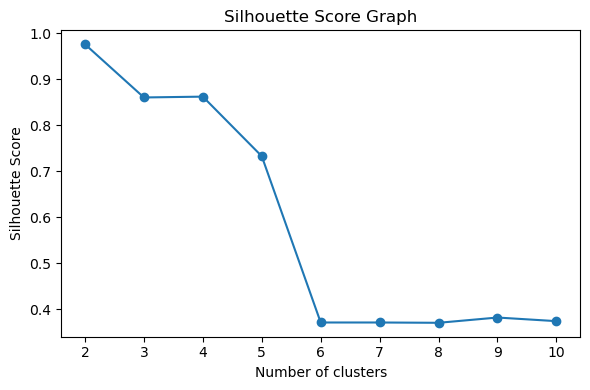

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Combinar os dataframes
df_combined_X20_Y20 = pd.concat([X_2020, Y_2020])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])
df_combined_X14_Y20 = pd.concat([X_2014, Y_2020])
df_combined_X15_Y20 = pd.concat([X_2015, Y_2020])
df_combined_X16_Y20 = pd.concat([X_2016, Y_2020])
df_combined_X17_Y20 = pd.concat([X_2017, Y_2020])
df_combined_X18_Y20 = pd.concat([X_2018, Y_2020])
df_combined_X19_Y20 = pd.concat([X_2019, Y_2020])
df_combined_X14_Y21 = pd.concat([X_2014, Y_2021])
df_combined_X15_Y21 = pd.concat([X_2015, Y_2021])
df_combined_X16_Y21 = pd.concat([X_2016, Y_2021])
df_combined_X17_Y21 = pd.concat([X_2017, Y_2021])
df_combined_X18_Y21 = pd.concat([X_2018, Y_2021])
df_combined_X19_Y21 = pd.concat([X_2019, Y_2021])
df_combined_X20_Y21 = pd.concat([X_2020, Y_2021])
df_combined_X21_Y21 = pd.concat([X_2021, Y_2021])
df_combined_X14_Y22 = pd.concat([X_2014, Y_2022])
df_combined_X15_Y22 = pd.concat([X_2015, Y_2022])
df_combined_X16_Y22 = pd.concat([X_2016, Y_2022])
df_combined_X17_Y22 = pd.concat([X_2017, Y_2022])
df_combined_X18_Y22 = pd.concat([X_2018, Y_2022])
df_combined_X19_Y22 = pd.concat([X_2019, Y_2022])
df_combined_X20_Y22 = pd.concat([X_2020, Y_2022])
df_combined_X21_Y22 = pd.concat([X_2021, Y_2022])
df_combined_X22_Y22 = pd.concat([X_2022, Y_2022])

# Combina todos os dataframes em uma lista
dfs = [
   #df_combined_X20_Y20,
   #df_combined_X21_Y21,
  #  df_combined_X22_Y22,
    #df_combined_X14_Y20,
    #df_combined_X15_Y20,
    #df_combined_X16_Y20,
    #df_combined_X17_Y20,
    #df_combined_X18_Y20,
    #df_combined_X19_Y20,
    #df_combined_X14_Y21,
    #df_combined_X15_Y21,
    #df_combined_X16_Y21,
    #df_combined_X17_Y21,
    #df_combined_X18_Y21,
    #df_combined_X19_Y21,
   # df_combined_X20_Y21,
   # df_combined_X21_Y21,
   scaled_data,
   #df_combined_X15_Y22,
   #df_combined_X16_Y22,
   #df_combined_X17_Y22,
   #df_combined_X18_Y22,
   #df_combined_X19_Y22,
   #df_combined_X20_Y22,
   #df_combined_X21_Y22,
   #df_combined_X22_Y22,
]

#mudar index de ticker e tentar deixar claro de qual ano é o ticker.

# Normalizar os dados e remover valores NaN
dfs_normalizados = [scaled_data]


# Gerar escores de silhueta e gráficos do método do cotovelo
for i, df_normalizado in enumerate(dfs_normalizados):
    fig, ax = plt.subplots(figsize=(6, 4))
    escores_silhueta = []
    range_clusters = range(2, 11)  # Variar o número de clusters de 2 a 10
    for num_clusters in range_clusters:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        labels = kmeans.fit_predict(df_normalizado)
        escores_silhueta.append(silhouette_score(df_normalizado, labels))

    # Gráfico do escore de silhueta
    ax.plot(range_clusters, escores_silhueta, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score Graph')

    plt.tight_layout()
    plt.show()


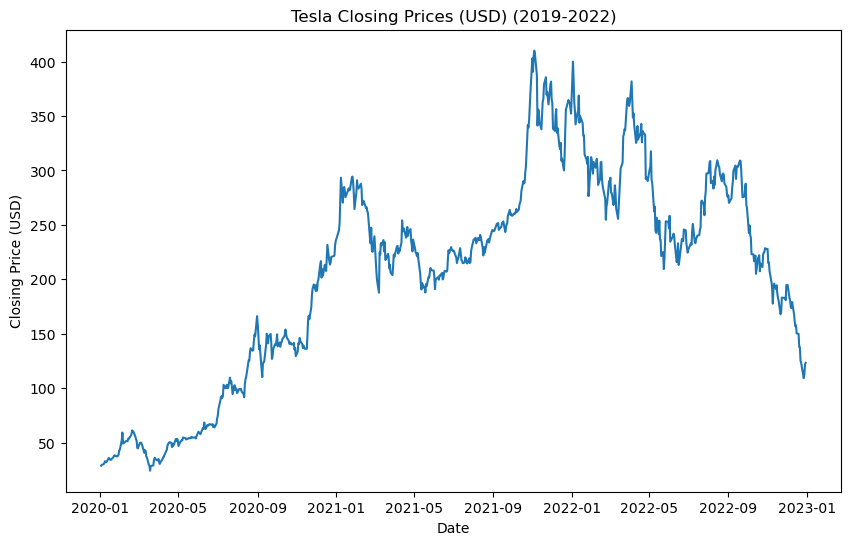

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Retrieve Tesla's data from Yahoo Finance
tesla = yf.Ticker("TSLA")
data = tesla.history(start="2020-01-01", end="2022-12-31")

# Extract the closing prices
closing_prices = data["Close"]

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(closing_prices)
plt.title("Tesla Closing Prices (USD) (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(False)
plt.show()


In [ ]:
scaled_data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

def cluster_analysis(data, model):
    # Remove rows with NaN values
    data = data.dropna()

    # Normalize the data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    # Apply dimensionality reduction using PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_normalized)

    # Apply the clustering model to the reduced data
    clusters = model.fit_predict(data_pca)

    # Get the tickers in the same cluster as "TSLA"
    tsla_cluster_label = clusters[-1]
    tickers_same_cluster = data.index[clusters == tsla_cluster_label].tolist()

    return tickers_same_cluster

# Set the parameters for DBSCAN
eps = 0.5
min_samples = 5

df = scaled_data

# Apply DBSCAN clustering to the reduced data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
tickers_same_cluster_dbscan = cluster_analysis(df, dbscan)

# Print the tickers in the same cluster as "TSLA" for DBSCAN
print("DBSCAN Clustering:")
print(tickers_same_cluster_dbscan)


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cluster_analysis(data, model):
    # Remover linhas com valores NaN
    

    # Normalizar os dados
    scaler = StandardScaler()
    df_normalized = scaler.fit_transform(data)

    # Aplicar o modelo de clustering nos dados normalizados
    clusters = model.fit_predict(df_normalized)

    # Encontrar o rótulo do cluster para "TSLA" (Y4)
    tsla_cluster_label = clusters[-1]

    # Obter os tickers no mesmo cluster que "TSLA" (Y4)
    tickers_same_cluster = data.index[clusters == tsla_cluster_label].tolist()

    return tickers_same_cluster

k = 4
df = scaled_data

# Aplicar K-means clustering nos dados
kmeans = KMeans(n_clusters=k, random_state=0)
tickers_same_cluster_kmeans = cluster_analysis(scaled_data, kmeans)

# Imprimir os tickers no mesmo cluster que "TSLA" (Y4) para K-means
print("K-means Clustering:")
print(tickers_same_cluster_kmeans)

# Aplicar Gaussian Mixture Model clustering nos dados
gmm = GaussianMixture(n_components=k, random_state=0)
tickers_same_cluster_gmm = cluster_analysis(scaled_data, gmm)

# Imprimir os tickers no mesmo cluster que "TSLA" (Y4) para Gaussian Mixture Model
print("Gaussian Mixture Model Clustering:")
print(tickers_same_cluster_gmm)

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# Aplicar K-means clustering nos dados
kmeans = KMeans(n_clusters=k, random_state=0)
tickers_same_cluster_kmeans = cluster_analysis(df, kmeans)

# Imprimir os tickers no mesmo cluster que "TSLA" (Y4) para K-means
print("K-means Clustering:")
print(tickers_same_cluster_kmeans)

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering:
['AAPL18', 'AMD18', 'AMZN18', 'TSLA']


In [ ]:
# Aplicar Gaussian Mixture Model clustering nos dados
gmm = GaussianMixture(n_components=4, random_state=0)
tickers_same_cluster_gmm = cluster_analysis(scaled_data, gmm)

# Imprimir os tickers no mesmo cluster que "TSLA" (Y4) para Gaussian Mixture Model
print("Gaussian Mixture Model Clustering:")
print(tickers_same_cluster_gmm)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

[*********************100%***********************]  1 of 1 completed


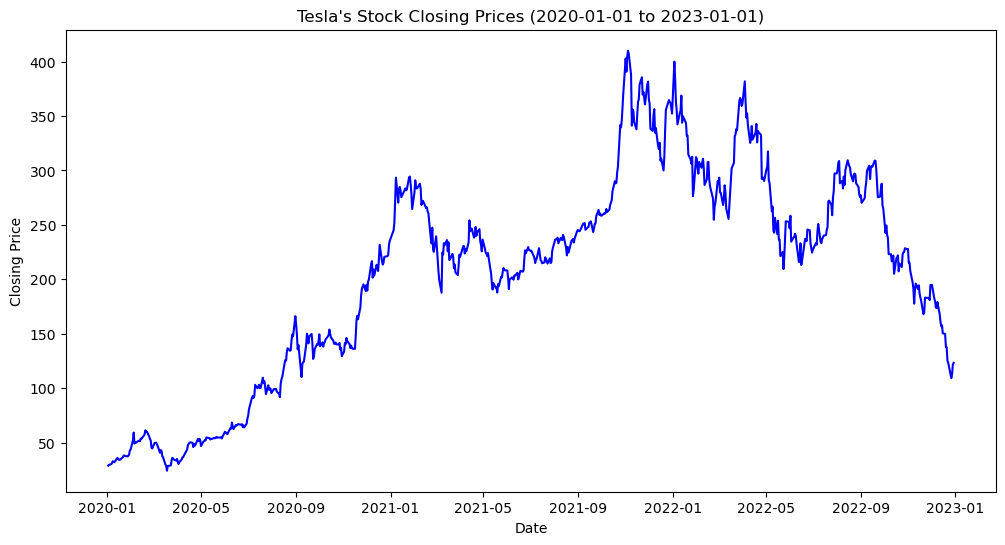

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the ticker symbol for Tesla
ticker = "TSLA"

# Define the start and end dates
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the "Close" prices
close_prices = data["Close"]

# Create a line plot of the closing prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, color="blue")
plt.title("Tesla's Stock Closing Prices (2020-01-01 to 2023-01-01)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(False)
plt.show()


[*********************100%***********************]  2 of 2 completed


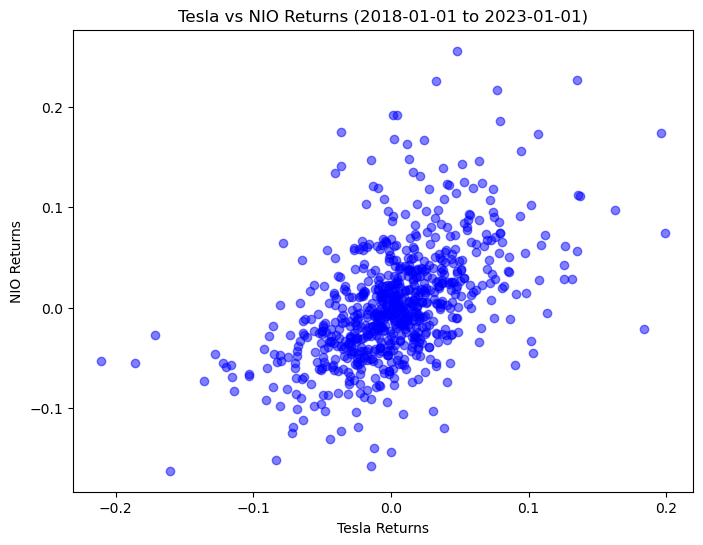

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for Tesla and NIO
tickers = ["TSLA", "NIO"]

# Define the start and end dates
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch the historical data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the "Close" prices for Tesla and NIO
close_tsla = data["Close"]["TSLA"]
close_nio = data["Close"]["NIO"]

# Calculate the daily returns for Tesla and NIO
returns_tsla = close_tsla.pct_change()
returns_nio = close_nio.pct_change()

# Create a scatter plot of the returns
plt.figure(figsize=(8, 6))
plt.scatter(returns_tsla, returns_nio, color='blue', alpha=0.5)
plt.title("Tesla vs NIO Returns (2018-01-01 to 2023-01-01)")
plt.xlabel("Tesla Returns")
plt.ylabel("NIO Returns")
plt.grid(False)
plt.show()


[*********************100%***********************]  2 of 2 completed
Correlation between TSLA and AAPL 0.51951046416513
Beta coefficient between TSLA and AAPL: 1.0152989679654238


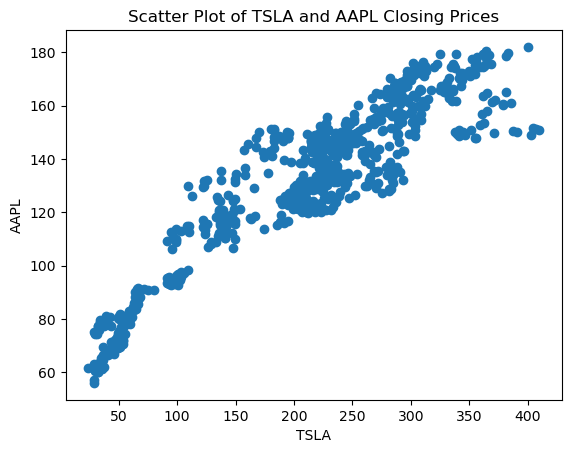

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for TSLA and NIO
tickers = ['TSLA', 'AAPL']

# Download stock data for TSLA and NIO from 2018 to 2023
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Close']

# Calculate daily returns for TSLA and NIO
returns = data.pct_change().dropna()

# Calculate correlation between TSLA and NIO
correlation = returns['TSLA'].corr(returns['AAPL'])
print("Correlation between TSLA and AAPL", correlation)

# Calculate beta coefficient between TSLA and NIO
covariance = returns['TSLA'].cov(returns['AAPL'])
variance = returns['AAPL'].var()
beta = covariance / variance
print("Beta coefficient between TSLA and AAPL:", beta)

# Create a scatter plot of the closing prices for TSLA and NIO
plt.scatter(data['TSLA'], data['AAPL'])
plt.xlabel('TSLA')
plt.ylabel('AAPL')
plt.title('Scatter Plot of TSLA and AAPL Closing Prices')
plt.show()


[*********************100%***********************]  4 of 4 completed
Correlation between TSLA and AAPL: 0.5194000624865975
Correlation between TSLA and AMZN: 0.47720287706940473
Correlation between TSLA and BAC: 0.2844185352628996


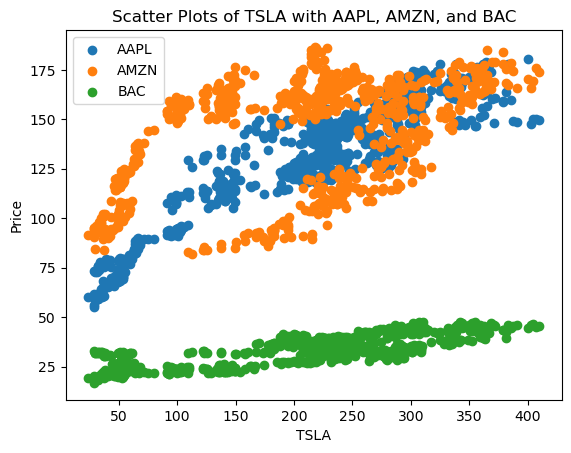

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for TSLA, AAPL, AMZN, and BAC
tickers = ['TSLA', 'AAPL', 'AMZN', 'BAC']

# Download stock data for TSLA, AAPL, AMZN, and BAC from 2018 to 2023
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns for TSLA, AAPL, AMZN, and BAC
returns = data.pct_change().dropna()

# Calculate correlation between TSLA and AAPL
correlation_aapl = returns['TSLA'].corr(returns['AAPL'])
print("Correlation between TSLA and AAPL:", correlation_aapl)

# Calculate correlation between TSLA and AMZN
correlation_amzn = returns['TSLA'].corr(returns['AMZN'])
print("Correlation between TSLA and AMZN:", correlation_amzn)

# Calculate correlation between TSLA and BAC
correlation_bac = returns['TSLA'].corr(returns['BAC'])
print("Correlation between TSLA and BAC:", correlation_bac)

# Create scatter plots of the closing prices for TSLA and other companies
plt.scatter(data['TSLA'], data['AAPL'], label='AAPL')
plt.scatter(data['TSLA'], data['AMZN'], label='AMZN')
plt.scatter(data['TSLA'], data['BAC'], label='BAC')
plt.xlabel('TSLA')
plt.ylabel('Price')
plt.title('Scatter Plots of TSLA with AAPL, AMZN, and BAC')
plt.legend()
plt.show()


Picking the number K of clusters

In [ ]:
from sklearn.preprocessing import StandardScaler

# Remove rows with NaN values and standardize the data
scaler = StandardScaler()

df_combined_X14_Y20.dropna(inplace=True)
df_combined_X14_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X14_Y20), columns=df_combined_X14_Y20.columns, index=df_combined_X14_Y20.index)

df_combined_X15_Y20.dropna(inplace=True)
df_combined_X15_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X15_Y20), columns=df_combined_X15_Y20.columns, index=df_combined_X15_Y20.index)

df_combined_X16_Y20.dropna(inplace=True)
df_combined_X16_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X16_Y20), columns=df_combined_X16_Y20.columns, index=df_combined_X16_Y20.index)

df_combined_X17_Y20.dropna(inplace=True)
df_combined_X17_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X17_Y20), columns=df_combined_X17_Y20.columns, index=df_combined_X17_Y20.index)

df_combined_X18_Y20.dropna(inplace=True)
df_combined_X18_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X18_Y20), columns=df_combined_X18_Y20.columns, index=df_combined_X18_Y20.index)

df_combined_X19_Y20.dropna(inplace=True)
df_combined_X19_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X19_Y20), columns=df_combined_X19_Y20.columns, index=df_combined_X19_Y20.index)

df_combined_X20_Y20.dropna(inplace=True)
df_combined_X20_Y20_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X20_Y20), columns=df_combined_X20_Y20.columns, index=df_combined_X20_Y20.index)

df_combined_X14_Y21.dropna(inplace=True)
df_combined_X14_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X14_Y21), columns=df_combined_X14_Y21.columns, index=df_combined_X14_Y21.index)

df_combined_X15_Y21.dropna(inplace=True)
df_combined_X15_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X15_Y21), columns=df_combined_X15_Y21.columns, index=df_combined_X15_Y21.index)

df_combined_X16_Y21.dropna(inplace=True)
df_combined_X16_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X16_Y21), columns=df_combined_X16_Y21.columns, index=df_combined_X16_Y21.index)

df_combined_X17_Y21.dropna(inplace=True)
df_combined_X17_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X17_Y21), columns=df_combined_X17_Y21.columns, index=df_combined_X17_Y21.index)

df_combined_X18_Y21.dropna(inplace=True)
df_combined_X18_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X18_Y21), columns=df_combined_X18_Y21.columns, index=df_combined_X18_Y21.index)

df_combined_X19_Y21.dropna(inplace=True)
df_combined_X19_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X19_Y21), columns=df_combined_X19_Y21.columns, index=df_combined_X19_Y21.index)

df_combined_X20_Y21.dropna(inplace=True)
df_combined_X20_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X20_Y21), columns=df_combined_X20_Y21.columns, index=df_combined_X20_Y21.index)

df_combined_X21_Y21.dropna(inplace=True)
df_combined_X21_Y21_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X21_Y21), columns=df_combined_X21_Y21.columns, index=df_combined_X21_Y21.index)

df_combined_X14_Y22.dropna(inplace=True)
df_combined_X14_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X14_Y22), columns=df_combined_X14_Y22.columns, index=df_combined_X14_Y22.index)

df_combined_X15_Y22.dropna(inplace=True)
df_combined_X15_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X15_Y22), columns=df_combined_X15_Y22.columns, index=df_combined_X15_Y22.index)

df_combined_X16_Y22.dropna(inplace=True)
df_combined_X16_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X16_Y22), columns=df_combined_X16_Y22.columns, index=df_combined_X16_Y22.index)

df_combined_X17_Y22.dropna(inplace=True)
df_combined_X17_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X17_Y22), columns=df_combined_X17_Y22.columns, index=df_combined_X17_Y22.index)

df_combined_X18_Y22.dropna(inplace=True)
df_combined_X18_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X18_Y22), columns=df_combined_X18_Y22.columns, index=df_combined_X18_Y22.index)

df_combined_X19_Y22.dropna(inplace=True)
df_combined_X19_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X19_Y22), columns=df_combined_X19_Y22.columns, index=df_combined_X19_Y22.index)

df_combined_X20_Y22.dropna(inplace=True)
df_combined_X20_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X20_Y22), columns=df_combined_X20_Y22.columns, index=df_combined_X20_Y22.index)

df_combined_X21_Y22.dropna(inplace=True)
df_combined_X21_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X21_Y22), columns=df_combined_X21_Y22.columns, index=df_combined_X21_Y22.index)

df_combined_X22_Y22.dropna(inplace=True)
df_combined_X22_Y22_scaled = pd.DataFrame(scaler.fit_transform(df_combined_X22_Y22), columns=df_combined_X22_Y22.columns, index=df_combined_X22_Y22.index)


In [ ]:
df_combined_X15_Y21_scaled.head()

Close STD  Volume STD  Close Mean  Volume Mean  Close Max  Volume Max  \
A15     -0.052432    0.135313   -0.051677     0.188516  -0.053280    0.014743   
AA15    -0.050541    1.488802   -0.053763     1.607989  -0.053531    1.303627   
AAIC15  -0.051325   -0.247121   -0.055275    -0.205817  -0.054915   -0.258173   
AAL15   -0.051318    3.201226   -0.050680     1.766777  -0.052072    5.399544   
AAOI15  -0.051766   -0.238395   -0.055902    -0.204266  -0.055362   -0.283537   

        Close Min  Volume Min  Close Median  Volume Median  Close Range  \
A15     -0.049600    0.308497     -0.051000       0.185072    -0.053638   
AA15    -0.054501    2.320741     -0.053591       1.637413    -0.051986   
AAIC15  -0.056750   -0.174821     -0.054854      -0.200373    -0.052988   
AAL15   -0.048212    1.787877     -0.050287       1.656923    -0.052530   
AAOI15  -0.058001   -0.185094     -0.055378      -0.201504    -0.053097   

        Volume Range  Mean Returns  Volatility  Volume Mean Returns  \
A15        -0.004996      0.196710   -0.639852            -0.155486   
AA15        1.223662     -0.764525   -0.097917            -0.160136   
AAIC15     -0.261340     -1.315204   -0.480122            -0.135853   
AAL15       5.590462     -0.280382   -0.132697            -0.158924   
AAOI15     -0.287476      1.386458    0.544106            -0.077977   

        Volume Volatility  Close Skewness  Volume Skewness  
A15             -0.104008       -1.293344        -0.876552  
AA15            -0.102991        0.645100        -0.882993  
AAIC15          -0.094197       -0.069850         0.147371  
AAL15           -0.098196        0.832996         1.645358  
AAOI15          -0.067662       -1.141886        -0.394857

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def encontrar_tickers_tsla(cluster_labels, tickers):
    cluster_tsla = cluster_labels[tickers.index('TSLA')]
    tickers_cluster_tsla = [tickers[i] for i, label in enumerate(cluster_labels) if label == cluster_tsla]
    return tickers_cluster_tsla

dfs_scaled = [
    df_combined_X14_Y20_scaled,
    df_combined_X15_Y20_scaled,
    df_combined_X16_Y20_scaled,
    df_combined_X17_Y20_scaled,
    df_combined_X18_Y20_scaled,
    df_combined_X19_Y20_scaled,
    df_combined_X20_Y20_scaled,
    df_combined_X14_Y21_scaled,
    df_combined_X15_Y21_scaled,
    df_combined_X16_Y21_scaled,
    df_combined_X17_Y21_scaled,
    df_combined_X18_Y21_scaled,
    df_combined_X19_Y21_scaled,
    df_combined_X20_Y21_scaled,
    df_combined_X21_Y21_scaled,
    df_combined_X14_Y22_scaled,
    df_combined_X15_Y22_scaled,
    df_combined_X16_Y22_scaled,
    df_combined_X17_Y22_scaled,
    df_combined_X18_Y22_scaled,
    df_combined_X19_Y22_scaled,
    df_combined_X20_Y22_scaled,
    df_combined_X21_Y22_scaled,
    df_combined_X22_Y22_scaled
]

for df_scaled in dfs_scaled:
    kmeans = KMeans(n_clusters=5, random_state=0)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    kmeans_tsla_clusters = encontrar_tickers_tsla(kmeans_labels, df_scaled.columns)
    print(f"TSLA clusters (K-means): {kmeans_tsla_clusters}")

    gmm = GaussianMixture(n_components=5, random_state=0)
    gmm.fit(df_scaled)
    gmm_labels = gmm.predict(df_scaled)
    gmm_tsla_clusters = encontrar_tickers_tsla(gmm_labels, df_scaled.columns)
    print(f"TSLA clusters (Gaussian Mixture): {gmm_tsla_clusters}")


c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'Index' object has no attribute 'index'

In [ ]:
df = df_combined_X20_Y20

c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gugah\anaconda3\lib\site-packages\sklearn\clust

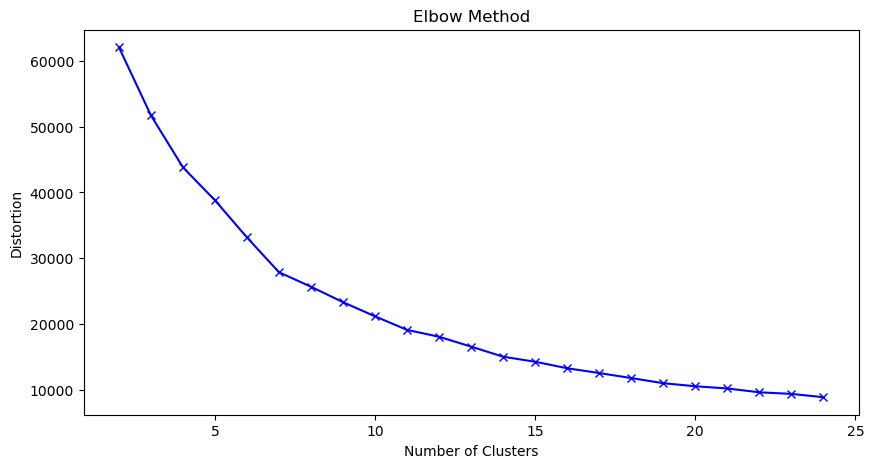

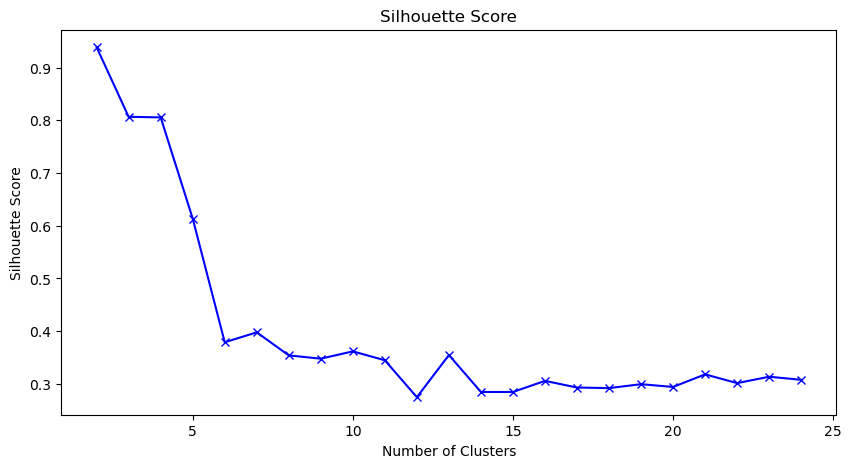

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Remove rows with NaN values
df.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Perform elbow method to determine the optimal number of clusters
distortions = []
silhouette_scores = []
k_values = range(2, 25)  # Test cluster numbers from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to closest centroid
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


In [ ]:
dfs_scaled = [
    df_combined_X14_Y20_scaled,
    df_combined_X15_Y20_scaled,
    df_combined_X16_Y20_scaled,
    df_combined_X17_Y20_scaled,
    df_combined_X18_Y20_scaled,
    df_combined_X19_Y20_scaled,
    df_combined_X20_Y20_scaled,
    df_combined_X14_Y21_scaled,
    df_combined_X15_Y21_scaled,
    df_combined_X16_Y21_scaled,
    df_combined_X17_Y21_scaled,
    df_combined_X18_Y21_scaled,
    df_combined_X19_Y21_scaled,
    df_combined_X20_Y21_scaled,
    df_combined_X21_Y21_scaled,
    df_combined_X14_Y22_scaled,
    df_combined_X15_Y22_scaled,
    df_combined_X16_Y22_scaled,
    df_combined_X17_Y22_scaled,
    df_combined_X18_Y22_scaled,
    df_combined_X19_Y22_scaled,
    df_combined_X20_Y22_scaled,
    df_combined_X21_Y22_scaled,
    df_combined_X22_Y22_scaled
]

NameError: name 'df_combined_X14_Y20_scaled' is not defined

In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering on df_combined
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(dfs_scaled)

# Find the cluster label of "TSLA" (Y4)
tsla_cluster_label = clusters[-1]

# Get the tickers in the same cluster as "TSLA"
tickers_same_cluster = dfs_scaled.index[clusters == tsla_cluster_label].tolist()


# Print the tickers in the same cluster as "TSLA"
print(tickers_same_cluster)

from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model clustering on df_combined
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(df_scaled)
clusters = gmm.predict(df_scaled)

# Find the cluster label of "TSLA" (Y4)
tsla_cluster_label = clusters[-1]

# Get the tickers in the same cluster as "TSLA"
tickers_same_cluster = df_scaled.index[clusters == tsla_cluster_label].tolist()

# Print the tickers in the same cluster as "TSLA"
print(tickers_same_cluster)


NameError: name 'dfs_scaled' is not defined

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model clustering on df_combined
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(df_scaled)
clusters = gmm.predict(df_scaled)

# Find the cluster label of "TSLA" (Y4)
tsla_cluster_label = clusters[-1]

# Get the tickers in the same cluster as "TSLA"
tickers_same_cluster = df_scaled.index[clusters == tsla_cluster_label].tolist()

# Print the tickers in the same cluster as "TSLA"
print(tickers_same_cluster)


NameError: name 'df_scaled' is not defined